In [76]:
!pip install yfinance
#!pip install pandas

In [77]:
import yfinance as yf
import pandas as pd
import requests     
from bs4 import BeautifulSoup

In [79]:
apple = yf.Ticker("AAPL")

### Stock Info


In [80]:
apple_info=apple.info
apple_info

{'52WeekChange': 0.2907561,
 'SandP52WeekChange': 0.37508416,
 'address1': 'One Apple Park Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 149.07,
 'askSize': 2200,
 'averageDailyVolume10Day': 63526662,
 'averageVolume': 74522680,
 'averageVolume10days': 63526662,
 'beta': 1.222222,
 'beta3Year': None,
 'bid': 149.06,
 'bidSize': 1400,
 'bookValue': 3.882,
 'category': None,
 'circulatingSupply': None,
 'city': 'Cupertino',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'currentPrice': 148.85,
 'currentRatio': 1.062,
 'dateShortInterest': 1634256000,
 'dayHigh': 149.73,
 'dayLow': 148.49,
 'debtToEquity': 210.782,
 'dividendRate': 0.88,
 'dividendYield': 0.0058999998,
 'earningsGrowth': 1,
 'earningsQuarterlyGrowth': 0.932,
 'ebitda': 110934999040,
 'ebitdaMargins': 0.31955,
 'enterpriseToEbitda': 22.915,
 'enterpriseToRevenue': 7.323,
 'enterpriseValue': 2542079311872,
 'exDividendDate': 1628208000,
 'exc

In [81]:
apple_info['country']

'United States'

### Extracting Share Price


In [ ]:
apple_share_price_data = apple.history(period="max")

In [82]:
apple_share_price_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,1980-12-12,0.100600,0.101037,0.100600,0.100600,469033600,0.0,0.0
1,1,1980-12-15,0.095789,0.095789,0.095352,0.095352,175884800,0.0,0.0
2,2,1980-12-16,0.088790,0.088790,0.088353,0.088353,105728000,0.0,0.0
3,3,1980-12-17,0.090540,0.090977,0.090540,0.090540,86441600,0.0,0.0
4,4,1980-12-18,0.093165,0.093602,0.093165,0.093165,73449600,0.0,0.0


In [83]:
apple_share_price_data.reset_index(inplace=True)

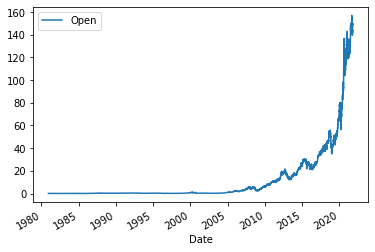

In [84]:
apple_share_price_data.plot(x="Date", y="Open")

### Extracting Dividends


In [85]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2020-08-07    0.205000
2020-11-06    0.205000
2021-02-05    0.205000
2021-05-07    0.220000
2021-08-06    0.220000
Name: Dividends, Length: 72, dtype: float64

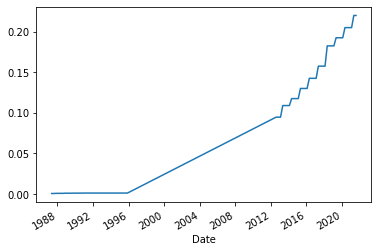

In [86]:
apple.dividends.plot()

In [87]:
amd = yf.Ticker("AMD")

In [88]:
amd_info=amd.info
amd_info['country']


'United States'

In [89]:
amd_info['sector']

'Technology'

In [90]:
amd_share_price_data = amd.history(period="max")


In [91]:
amd_share_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.0,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.0,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.0,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.0,3.020833,2.906250,2.916667,130800,0,0.0


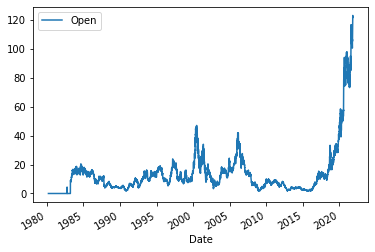

In [92]:
amd_share_price_data.reset_index(inplace=True)
amd_share_price_data.plot(x="Date", y="Open")

In [179]:
#Extracting Stock Data Using a Web Scraping

In [155]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data  = requests.get(url).text

In [156]:
soup = BeautifulSoup(data, 'html5lib')

In [157]:
netflix_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    # Finally we append the data of each row to the table
    netflix_data = netflix_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)    

In [159]:
netflix_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


In [160]:
read_html_pandas_data = pd.read_html(url)

In [161]:
read_html_pandas_data = pd.read_html(str(soup))
netflix_dataframe = read_html_pandas_data[0]

In [162]:
netflix_dataframe.head()

,Date,Open,High,Low,Close*,Adj Close**,Volume
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,528.21,78560600
1,"May 01, 2021",512.65,518.95,478.54,502.81,502.81,66927600
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,513.47,111573300
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,521.66,90183900
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,538.85,61902300


In [114]:
netflix_dataframe.reset_index(inplace=True)


In [168]:
netflix_dataframe.Open=pd.to_numeric(netflix_dataframe.Open, errors='coerce')
netflix_dataframe['Date']=pd.to_datetime(netflix_dataframe['Date'])

In [169]:
netflix_dataframe.sort_values(by='Date',inplace=True)
netflix_dataframe.tail()

,Date,Open,High,Low,Close*,Adj Close**,Volume
4,2021-02-01,536.79,566.65,518.28,538.85,538.85,61902300
3,2021-03-01,545.57,556.99,492.85,521.66,521.66,90183900
2,2021-04-01,529.93,563.56,499.00,513.47,513.47,111573300
1,2021-05-01,512.65,518.95,478.54,502.81,502.81,66927600
0,2021-06-01,504.01,536.13,482.14,528.21,528.21,78560600


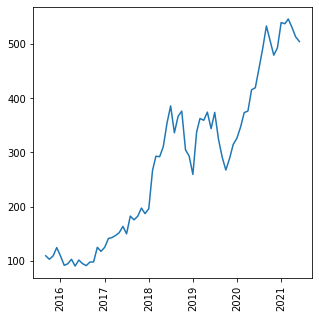

In [171]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(5, 5))
plt.plot(netflix_dataframe['Date'], netflix_dataframe['Open'])
plt.tick_params(axis='x', which='major', labelsize=10,labelrotation=90)
plt.show()


In [172]:
url2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
data  = requests.get(url2).text

In [125]:
soup2=BeautifulSoup(data,'html5lib')

In [126]:
title=soup2.title
title

<title>Amazon.com, Inc. (AMZN) Stock Historical Prices &amp; Data - Yahoo Finance</title>

In [127]:
amazon_data = pd.DataFrame(columns=["Date", "Open", "High", "Low", "Close", "Volume"])

for row in soup.find("tbody").find_all("tr"):
    col1 = row.find_all("td")
    date = col1[0].text
    Open = col1[1].text
    high = col1[2].text
    low = col1[3].text
    close = col1[4].text
    adj_close = col1[5].text
    volume = col1[6].text
    
    amazon_data = amazon_data.append({"Date":date, "Open":Open, "High":high, "Low":low, "Close":close, "Adj Close":adj_close, "Volume":volume}, ignore_index=True)

In [131]:
amazon_data.tail(5)

,Date,Open,High,Low,Close,Volume,Adj Close
65,"Jan 01, 2016",109.00,122.18,90.11,91.84,"488,193,200",91.84
66,"Dec 01, 2015",124.47,133.27,113.85,114.38,"319,939,200",114.38
67,"Nov 01, 2015",109.20,126.60,101.86,123.33,"320,321,800",123.33
68,"Oct 01, 2015",102.91,115.83,96.26,108.38,"446,204,400",108.38
69,"Sep 01, 2015",109.35,111.24,93.55,103.26,"497,401,200",103.26


In [175]:
amazon_data['Date']=pd.to_datetime(amazon_data['Date'])
amazon_data.sort_values(by='Date',inplace=True)
amazon_data.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
4,2021-02-01,536.79,566.65,518.28,538.85,"61,902,300",538.85
3,2021-03-01,545.57,556.99,492.85,521.66,"90,183,900",521.66
2,2021-04-01,529.93,563.56,499.00,513.47,"111,573,300",513.47
1,2021-05-01,512.65,518.95,478.54,502.81,"66,927,600",502.81
0,2021-06-01,504.01,536.13,482.14,528.21,"78,560,600",528.21


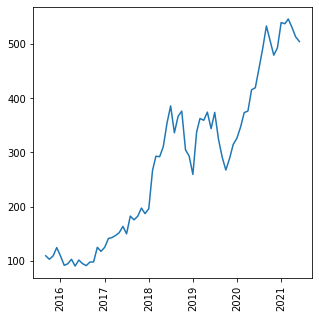

In [177]:

plt.figure(figsize=(5, 5))
plt.plot(amazon_data['Date'], amazon_data['Open'])
plt.tick_params(axis='x', which='major', labelsize=10,labelrotation=90)
plt.show()